# Web Scraping

## Objetivo

Nosso objetivo é encontrar algum site para ~~roubarmos~~ extrairmos informações e criarmos um banco de dados. *(com muito respeito)*

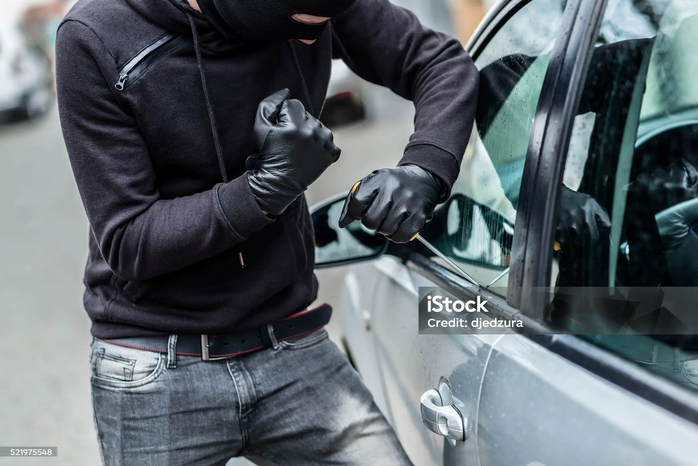

## Encontra a Vítima Perfeita

Nossa principal ferramenta nesse momento é o **"Ver Código Fonte"** do navegador.

### Sites Difíceis
- **Javascript na página** ([UOL Política](https://noticias.uol.com.br/politica/))
- **Páginas com "ver mais"** ([G1 Política](https://g1.globo.com/politica/))

Para lidar com esses casos, precisamos usar uma ferramenta chamada **Selenium**.

### Sites Fáceis
- **Páginas em HTML simples** ou com **URL editável** ([Senado Notícias](https://www12.senado.leg.br/noticias/temas/politica/pagina/1))

**Encontramos nossa vítima!**


## Arma do crime

#### **`requests`**
- Biblioteca utilizada para **fazer requisições HTTP**.
- Permite acessar páginas web e obter o conteúdo delas, como HTML, JSON ou arquivos de texto.
- Fundamental para capturar o código-fonte de uma página para análise.

#### **`BeautifulSoup`** (do pacote `bs4`)
- Biblioteca usada para **analisar e manipular documentos HTML ou XML**.
- Facilita a extração de informações específicas, como títulos, links ou tabelas, a partir do conteúdo HTML obtido.

### Fluxo básico:
1. Utilize `requests` para fazer a requisição e capturar o conteúdo HTML da página.
2. Use `BeautifulSoup` para analisar o HTML e extrair os dados que deseja.


##  Capturando o HTML da Vítima

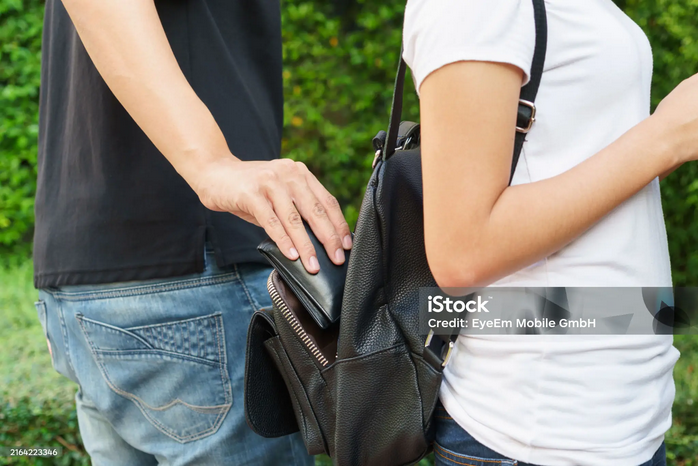

In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
# URL da vítima
url = "https://www12.senado.leg.br/noticias/temas/politica/pagina/"

# Cabeçalho para simular um navegador
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36"
}

In [3]:
response = requests.get(url, headers=headers)
response
# <Response [200]> -> requisição foi bem-sucedida 

<Response [200]>

In [4]:
soup = BeautifulSoup(response.text, "html.parser")

In [5]:
soup


<!DOCTYPE html>

<html lang="pt-br">
<head>
<link href="https://www12.senado.leg.br/noticias/temas/politica/pagina" rel="canonical"/>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="pt_BR" property="og:locale">
<meta content="Senado Federal" property="og:site_name">
<!-- HTML5 shim and Respond.js IE8 support of HTML5 elements and media queries -->
<!--[if lt IE 9]>
      <script src="https://oss.maxcdn.com/libs/html5shiv/3.7.0/html5shiv.js"></script>
      <script src="https://oss.maxcdn.com/libs/respond.js/1.3.0/respond.min.js"></script>
    <![endif]-->
<title>Política — Senado Notícias</title>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<script>PORTAL_URL = 'https://www12.senado.leg.br/noticias';</script>
<script data-bundle="production" src="https://www12.senado.leg.br/noticias/++plone++production/++unique++2025-06-23T14:48:25.842259/default.js" type="text/javascript"></script>
<script data-bundle="senado_no

In [7]:
# Exibe o html como texto
print(soup.get_text())












Política — Senado Notícias



























Ir para conteúdo principal








 Menu












Acessibilidade
Fale com o Senado



Fale com o Senado













Buscar




Clique para receber notícias do Senado em seu Whatsapp



Facebook do Senado Federal



Twitter do Senado Federal



Canal Youtube da TV Senado



Flickr da Agência Senado



Instagram do Senado Federal



Senado Federal no Telegram



Linkedin do Senado Federal




Buscar



Buscar









MENU DESTA SEÇÃO



Especiais

Reportagens
Arquivo S
Web Stories
Grandes coberturas
Acervo


Fotos

Banco de imagens
Galerias


Serviços

Senado Multimídia
Notificações
Newsletter


Saiba Mais

Glossário legislativo
Entenda o assunto
Manual de Comunicação
Constituições


Expediente

Quem somos
Fale com a gente
Política de uso
Política de uso para redes sociais




Senado na COP 30


Reforma Tributária


40 anos da Redemocratização













Política










Combate ao câncer, vacinas e segurança alime

## Procurando uma brecha

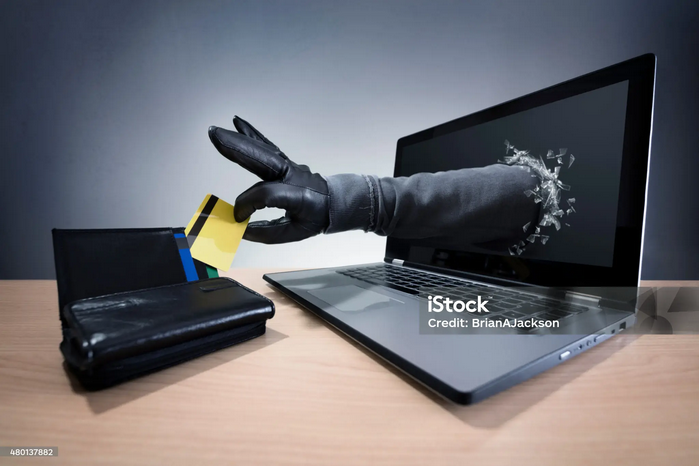

As Notícias Seguem o Seguinte Padrão:

```html
<div id="textoMateria">
    <h3>Todas matérias</h3>
    <ol class="list-unstyled lista-resultados">
        <li>
            <p>
                <span class="glyphicon glyphicon-list-alt"></span>
                <a href="/noticias/materias/2024/12/13/cdh-apoia-criacao-da-frente-mista-de-combate-a-violencia-politica-de-genero">
                    CDH apoia criação da Frente Mista de Combate à Violência Política de Gênero
                </a>
                <small class="text-muted">
                    13/12/2024 15h11
                </small>
            </p>
        </li>
    </ol>
</div>


In [8]:
# Localizando o bloco com o id "textoMateria"
bloco_noticias = soup.find("div", id="textoMateria")

bloco_noticias

<div id="textoMateria">
<h3>Todas matérias</h3>
<ol class="list-unstyled lista-resultados">
<li>
<p>
<span class="glyphicon glyphicon-volume-up"></span>
<a href="/noticias/audios/2025/09/senadores-descartam-votacao-de-projeto-que-acaba-com-autonomia-do-bc">Senadores descartam votação de projeto que acaba com autonomia do BC</a>
<small class="text-muted">
                                
                                    05/09/2025 13h45
                                
                            </small>
</p>
</li>
<li>
<p>
<span class="glyphicon glyphicon-list-alt"></span>
<a href="/noticias/materias/2025/09/05/combate-ao-cancer-vacinas-e-seguranca-alimentar-estao-na-pauta-da-cas-na-quarta">Combate ao câncer, vacinas e segurança alimentar estão na pauta da CAS na quarta</a>
<small class="text-muted">
                                
                                    05/09/2025 13h02
                                
                            </small>
</p>
</li>
<li>
<p>
<span cl

**O elemento \<div\> é uma tag HTML que representa uma divisão ou contêiner genérico dentro de uma página web.**

In [9]:
links = [a['href'] for a in bloco_noticias.find_all('a', href=True)]
        
# Exibindo os links extraídos
for link in links:
    print(link)

/noticias/audios/2025/09/senadores-descartam-votacao-de-projeto-que-acaba-com-autonomia-do-bc
/noticias/materias/2025/09/05/combate-ao-cancer-vacinas-e-seguranca-alimentar-estao-na-pauta-da-cas-na-quarta
/noticias/materias/2025/09/04/debate-na-cra-aponta-falhas-na-reforma-agraria-governo-defende-avancos
/noticias/materias/2025/09/03/senador-iraja-comenta-decisao-do-stj-de-afastar-governador-do-tocantins
/noticias/materias/2025/09/03/izalci-diz-que-condenacao-de-bolsonaro-ja-esta-definida-no-stf
/noticias/materias/2025/09/03/seif-diz-que-depoimento-de-tagliaferro-reforca-necessidade-de-cpi
/noticias/materias/2025/09/03/senado-tera-sessoes-especiais-para-aviadores-dentistas-e-gestora-de-planos-de-saude
/noticias/materias/2025/09/03/girao-aponta-execucao-em-julgamento-do-stf-apos-tagliaferro-citar-suposta-fraude-no-tse
/noticias/materias/2025/09/03/senado-pode-votar-projeto-que-endurece-penas-para-crimes-violentos
/noticias/audios/2025/09/prazo-de-inelegibilidade-conta-a-partir-da-condena

**O que significa `'a', href=True`?**

- **`'a'`**: Refere-se à tag `<a>` em HTML, que é usada para criar links.
- **`href=True`**: Filtra apenas as tags `<a>` que possuem o atributo `href` definido, ou seja, que realmente apontam para algum link.

Essa combinação é utilizada para identificar e extrair apenas os links válidos dentro de uma página HTML.



## Acessando os bens

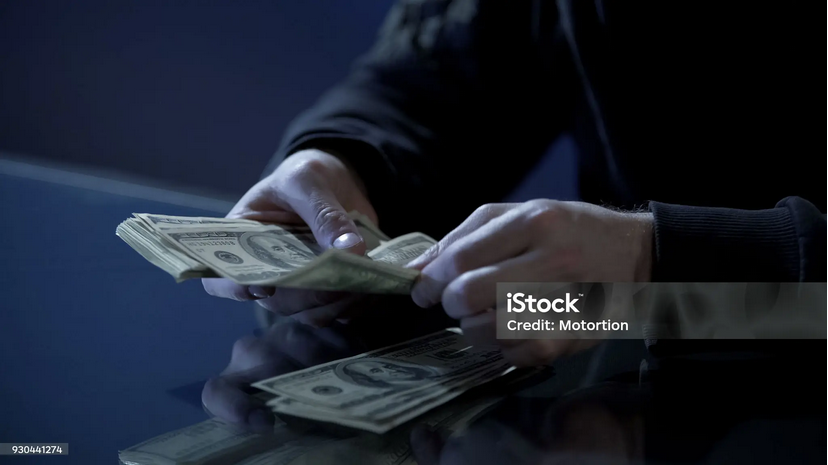


Conseguimos um pedaço do link para acessar as notícias, o link completo é algo da forma
https://www12.senado.leg.br + {link encontrado no passo anterior}

In [10]:
links = [link for link in links if "/noticias/materias" in link]

for link in links:
    print(link)

/noticias/materias/2025/09/05/combate-ao-cancer-vacinas-e-seguranca-alimentar-estao-na-pauta-da-cas-na-quarta
/noticias/materias/2025/09/04/debate-na-cra-aponta-falhas-na-reforma-agraria-governo-defende-avancos
/noticias/materias/2025/09/03/senador-iraja-comenta-decisao-do-stj-de-afastar-governador-do-tocantins
/noticias/materias/2025/09/03/izalci-diz-que-condenacao-de-bolsonaro-ja-esta-definida-no-stf
/noticias/materias/2025/09/03/seif-diz-que-depoimento-de-tagliaferro-reforca-necessidade-de-cpi
/noticias/materias/2025/09/03/senado-tera-sessoes-especiais-para-aviadores-dentistas-e-gestora-de-planos-de-saude
/noticias/materias/2025/09/03/girao-aponta-execucao-em-julgamento-do-stf-apos-tagliaferro-citar-suposta-fraude-no-tse
/noticias/materias/2025/09/03/senado-pode-votar-projeto-que-endurece-penas-para-crimes-violentos
/noticias/materias/2025/09/02/pontes-diz-que-julgamento-de-bolsonaro-e-atentado-ao-estado-democratico-de-direito
/noticias/materias/2025/09/02/para-aliados-de-bolsonaro-

Vamos acessar as notícias agora!

In [11]:
base_url = "https://www12.senado.leg.br"

# Acessando cada link completo

full_url = base_url + links[0]  # Construindo a URL completa
response = requests.get(full_url, headers=headers)

In [13]:
full_url

'https://www12.senado.leg.br/noticias/materias/2025/09/05/combate-ao-cancer-vacinas-e-seguranca-alimentar-estao-na-pauta-da-cas-na-quarta'

In [14]:
soup = BeautifulSoup(response.text, "html.parser")

In [15]:
soup


<!DOCTYPE html>

<html lang="pt-br">
<head>
<link href="https://www12.senado.leg.br/noticias/materias/2025/09/05/combate-ao-cancer-vacinas-e-seguranca-alimentar-estao-na-pauta-da-cas-na-quarta" rel="canonical"/>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="Câncer, Crianças, Imposto de Renda, Medicamentos, Saúde, Sistema Único de Saúde (SUS), Vacinação" name="keywords"/>
<meta content="pt_BR" property="og:locale">
<meta content="Senado Federal" property="og:site_name">
<!-- HTML5 shim and Respond.js IE8 support of HTML5 elements and media queries -->
<!--[if lt IE 9]>
      <script src="https://oss.maxcdn.com/libs/html5shiv/3.7.0/html5shiv.js"></script>
      <script src="https://oss.maxcdn.com/libs/respond.js/1.3.0/respond.min.js"></script>
    <![endif]-->
<meta content="Combate ao câncer, vacinas e segurança alimentar estão na pauta da CAS na quarta" property="og:title">
<meta content="A  Comissão de Assuntos Sociais    (CAS) se reúne

### Informações interessantes

```html
<head>
    <link rel="canonical" href="https://www12.senado.leg.br/noticias/materias/2024/12/13/cdh-apoia-criacao-da-frente-mista-de-combate-a-violencia-politica-de-genero" />
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="keywords" content="Mulheres na Política, Violência">
    
    <meta property="og:locale" content="pt_BR" />
    <meta property="og:site_name" content="Senado Federal" />
    <!-- HTML5 shim and Respond.js IE8 support of HTML5 elements and media queries -->
    <!--[if lt IE 9]>
        <script src="https://oss.maxcdn.com/libs/html5shiv/3.7.0/html5shiv.js"></script>
        <script src="https://oss.maxcdn.com/libs/respond.js/1.3.0/respond.min.js"></script>
    <![endif]-->

    <meta property="og:title" content="CDH apoia criação da Frente Mista de Combate à Violência Política de Gênero"/>
    <meta name="description" property="og:description" content="A Comissão de Direitos Humanos (CDH) aprovou na quarta-feira (11) o projeto de criação da Frente Parlamentar Mista de Combate à Violência Política de Gênero. O PRS 92/2023, da senadora Augusta Brito (PT-CE), recebeu parecer favorável do senador Weverton (PDT-MA) e agora segue para a Comissão Diretora do Senado."/>
    <meta property="og:url" content="https://www12.senado.leg.br/noticias/materias/2024/12/13/cdh-apoia-criacao-da-frente-mista-de-combate-a-violencia-politica-de-genero"/>
    <meta property="og:type" content="article"/>
    <meta property="article:publisher" content="150311598318037"/>
    <meta property="article:modified_time" content="2024-12-13T15:11:25-03:00"/>
    <meta name="sf_data" property="article:published_time" content="2024-12-13T15:11:25-03:00"/>
    <meta name="twitter:card" content="summary_large_image"/>
    <meta name="twitter:title" content="CDH apoia criação da Frente Mista de Combate à Violência Política de Gênero"/>
    <meta name="twitter:description" content="A Comissão de Direitos Humanos (CDH) aprovou na quarta-feira (11) o projeto de criação da Frente Parlamentar Mista de Combate à Violência Política de Gênero. O PRS 92/2023, da senadora Augusta Brito (PT-CE), recebeu parecer favorável do senador Weverton (PDT-MA) e agora segue para a Comissão Diretora do Senado."/>
    <meta name="sf_indexacao" property="article:tag" content="Mulheres na Política"/>
    <meta name="sf_indexacao" property="article:tag" content="Violência"/>
    <meta property="og:image" content="https://www12.senado.leg.br/noticias/materias/2024/12/13/cdh-apoia-criacao-da-frente-mista-de-combate-a-violencia-politica-de-genero/20241211_01344sc.jpg"/>
    <meta name="twitter:image" content="https://www12.senado.leg.br/noticias/materias/2024/12/13/cdh-apoia-criacao-da-frente-mista-de-combate-a-violencia-politica-de-genero/20241211_01344sc.jpg"/>
</head>


In [14]:
soup = BeautifulSoup(response.text, "html.parser")

In [15]:
print(soup.get_text(separator="\n").strip())

CDH apoia criação da Frente Mista de Combate à Violência Política de Gênero — Senado Notícias






























































Ir para conteúdo principal


















 Menu


























Acessibilidade


Fale com o Senado








Fale com o Senado




























Buscar










Clique para receber notícias do Senado em seu Whatsapp








Facebook do Senado Federal








Twitter do Senado Federal








Canal Youtube da TV Senado








Flickr da Agência Senado








Instagram do Senado Federal








Senado Federal no Telegram








Linkedin do Senado Federal










Buscar








Buscar




















MENU DESTA SEÇÃO








Especiais




Reportagens


Arquivo S


Web Stories


Grandes coberturas


Acervo






Fotos




Banco de imagens


Galerias






Serviços




Senado Multimídia


Notificações


Newsletter






Saiba Mais




Glossário legislativo


Entenda o assunto


Manual de Comunicação






Ex

In [16]:
# Extraindo o título
title = soup.find("meta", property="og:title")["content"]

# Extraindo a descrição
description = soup.find("meta", attrs={"name": "description"})["content"]

# Extraindo as indexações (tags)
tags = [tag["content"] for tag in soup.find_all("meta", attrs={"name": "sf_indexacao"})]

date = soup.find("meta", property="article:modified_time")["content"]

# Exibindo os resultados
print("Título:", title)
print("Descrição:", description)
print("Indexações:", tags)
print("Data:", date)

Título: Combate ao câncer, vacinas e segurança alimentar estão na pauta da CAS na quarta
Descrição: A  Comissão de Assuntos Sociais    (CAS) se reúne na quarta-feira (10), a partir das 9h, para votar uma pauta com vários projetos relacionados à saúde. Medicamentos contra o câncer, incentivo fiscal à vacinação e prevenção da insegurança alimentar em crianças são alguns dos focos das propostas em análise.
Indexações: ['Câncer', 'Crianças', 'Imposto de Renda', 'Medicamentos', 'Saúde', 'Sistema Único de Saúde (SUS)', 'Vacinação']
Data: 2025-09-05T13:02:20-03:00


In [17]:
# Localizando o bloco de texto
texto_materia = soup.find("div", id="textoMateria")

# Extraindo e limpando o texto
texto = texto_materia.get_text(separator="\n").strip()

In [19]:
print(texto)

A 
Comissão de Assuntos Sociais
 (CAS) se reúne na quarta-feira (10), a partir das 9h, para votar uma pauta com vários projetos relacionados à saúde. Medicamentos contra o câncer, incentivo fiscal à vacinação e prevenção da insegurança alimentar em crianças são alguns dos focos das propostas em análise.
 


Alguns projetos tramitam em decisão terminativa, ou seja, poderão seguir diretamente à Câmara dos Deputados caso aprovados. Outros ainda dependem do Plenário.
 


Vacina contra o câncer


De autoria da senadora Dra. Eudócia (PL-AL), o 
PL 126/2025
 cria o Marco Regulatório da Vacina e dos Medicamentos de Alto Custo Contra o Câncer.
 


A proposta estabelece diretrizes para pesquisa, produção, distribuição e acesso a vacinas e medicamentos oncológicos, com prioridade de oferta gratuita pelo SUS.
 


Com relatoria de Flávio Arns (PSB-PR), a matéria tramita em decisão terminativa.
 


Testes genéticos para prevenção de câncer em mulheres
 


O senador Rogério Carvalho (PT-SE) é o autor

In [20]:
informacoes = {
    "titulo": title,
    "descricao": description,
    "tags": tags,
    "texto": texto,
    "data": date,
}

In [21]:
informacoes

{'titulo': 'Combate ao câncer, vacinas e segurança alimentar estão na pauta da CAS na quarta',
 'descricao': 'A  Comissão de Assuntos Sociais   \xa0(CAS) se reúne na quarta-feira (10), a partir das 9h, para votar uma pauta com vários projetos relacionados à saúde. Medicamentos contra o câncer, incentivo fiscal à vacinação e prevenção da insegurança alimentar em crianças são alguns dos focos das propostas em análise.',
 'tags': ['Câncer',
  'Crianças',
  'Imposto de Renda',
  'Medicamentos',
  'Saúde',
  'Sistema Único de Saúde (SUS)',
  'Vacinação'],
 'texto': 'A \nComissão de Assuntos Sociais\n\xa0(CAS) se reúne na quarta-feira (10), a partir das 9h, para votar uma pauta com vários projetos relacionados à saúde. Medicamentos contra o câncer, incentivo fiscal à vacinação e prevenção da insegurança alimentar em crianças são alguns dos focos das propostas em análise.\n\xa0\n\n\nAlguns projetos tramitam em decisão terminativa, ou seja, poderão seguir diretamente à Câmara dos Deputados cas

## PERDEU!!!

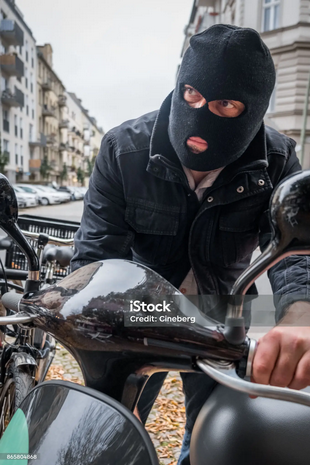

Agora vamos ~~roubar~~ extrair o máximo de coisas que conseguirmos sem deixar (muitas) evidências.

In [23]:
import time
import random

In [33]:
numero_paginas = 20
# numero_paginas = 5

links_noticias = []

for p in range(numero_paginas):
    url = f"https://www12.senado.leg.br/noticias/temas/politica/pagina/{p}"
    response = requests.get(url, headers=headers)

    print(p, response)
    
    soup = BeautifulSoup(response.text, "html.parser")
    bloco_noticias = soup.find("div", id="textoMateria")

    links = [a['href'] for a in bloco_noticias.find_all('a', href=True)]
    links = [link for link in links if "/noticias/materias" in link]

    links_noticias += links

    # Esperar alguns segundos antes de ir para a próxima página
    tempo_espera = random.uniform(0, 0.01)
    time.sleep(tempo_espera)


0 <Response [200]>
1 <Response [200]>
2 <Response [200]>
3 <Response [200]>
4 <Response [200]>
5 <Response [200]>
6 <Response [200]>
7 <Response [200]>
8 <Response [200]>
9 <Response [200]>
10 <Response [200]>
11 <Response [200]>
12 <Response [200]>
13 <Response [200]>
14 <Response [200]>
15 <Response [200]>
16 <Response [200]>
17 <Response [200]>
18 <Response [200]>
19 <Response [200]>


In [35]:
len(links_noticias)

252

In [36]:
import json
import pathlib

data_dir = pathlib.Path("data")  # Diretório onde os arquivos serão salvos
data_dir.mkdir(exist_ok=True) 

for i, link in enumerate(links_noticias):
    base_url = "https://www12.senado.leg.br"

    full_url = base_url + link  # Construindo a URL completa
    response = requests.get(full_url, headers=headers)

    soup = BeautifulSoup(response.text, "html.parser")

    title = soup.find("meta", property="og:title")["content"]
    description = soup.find("meta", attrs={"name": "description"})["content"]
    tags = [tag["content"] for tag in soup.find_all("meta", attrs={"name": "sf_indexacao"})]
    date = soup.find("meta", property="article:modified_time")["content"]
    
    texto_materia = soup.find("div", id="textoMateria")
    texto = texto_materia.get_text(separator="\n").strip()

    informacoes = {
        "url": full_url,
        "titulo": title,
        "descricao": description,
        "tags": tags,
        "texto": texto,
        "data": date,
    }
    
    filename = f"noticia_{i}.json"
    
    file_path = data_dir / filename

    with file_path.open("w", encoding="utf-8") as f:
        json.dump(informacoes, f, ensure_ascii=False, indent=4)
    
    print(f"Arquivo salvo: {file_path}")
    # tempo_espera = random.uniform(0, .5)
    time.sleep(tempo_espera)  

Arquivo salvo: data/noticia_0.json
Arquivo salvo: data/noticia_1.json
Arquivo salvo: data/noticia_2.json
Arquivo salvo: data/noticia_3.json
Arquivo salvo: data/noticia_4.json
Arquivo salvo: data/noticia_5.json
Arquivo salvo: data/noticia_6.json
Arquivo salvo: data/noticia_7.json
Arquivo salvo: data/noticia_8.json
Arquivo salvo: data/noticia_9.json
Arquivo salvo: data/noticia_10.json
Arquivo salvo: data/noticia_11.json
Arquivo salvo: data/noticia_12.json
Arquivo salvo: data/noticia_13.json
Arquivo salvo: data/noticia_14.json
Arquivo salvo: data/noticia_15.json
Arquivo salvo: data/noticia_16.json
Arquivo salvo: data/noticia_17.json
Arquivo salvo: data/noticia_18.json
Arquivo salvo: data/noticia_19.json
Arquivo salvo: data/noticia_20.json
Arquivo salvo: data/noticia_21.json
Arquivo salvo: data/noticia_22.json
Arquivo salvo: data/noticia_23.json
Arquivo salvo: data/noticia_24.json
Arquivo salvo: data/noticia_25.json
Arquivo salvo: data/noticia_26.json
Arquivo salvo: data/noticia_27.json
Ar

KeyboardInterrupt: 

## Sequestro relâmpago

In [39]:
from joblib import Parallel, delayed

def processar_link(i, link):
    full_url = base_url + link
    response = requests.get(full_url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    title = soup.find("meta", property="og:title")["content"]
    description = soup.find("meta", attrs={"name": "description"})["content"]
    tags = [tag["content"] for tag in soup.find_all("meta", attrs={"name": "sf_indexacao"})]
    date = soup.find("meta", property="article:modified_time")["content"]

    texto_materia = soup.find("div", id="textoMateria")
    texto = texto_materia.get_text(separator="\n").strip()

    informacoes = {
        "url": full_url,
        "titulo": title,
        "descricao": description,
        "tags": tags,
        "texto": texto,
        "data": date,
    }

    file_path = data_dir / f"noticia_{i}.json"
    with file_path.open("w", encoding="utf-8") as f:
        json.dump(informacoes, f, ensure_ascii=False, indent=4)

    print(f"Arquivo salvo: {file_path}")

    tempo_espera = random.uniform(0, .5)
    time.sleep(tempo_espera)  # ainda vale a pena para não sobrecarregar o servidor

# Executa em paralelo com threads
Parallel(n_jobs=8, prefer="threads")(
    delayed(processar_link)(i, link) for i, link in enumerate(links_noticias)
)

Arquivo salvo: data/noticia_5.json
Arquivo salvo: data/noticia_1.json
Arquivo salvo: data/noticia_6.json
Arquivo salvo: data/noticia_3.json
Arquivo salvo: data/noticia_2.json
Arquivo salvo: data/noticia_4.json
Arquivo salvo: data/noticia_7.json
Arquivo salvo: data/noticia_0.json
Arquivo salvo: data/noticia_9.json
Arquivo salvo: data/noticia_10.json
Arquivo salvo: data/noticia_8.json
Arquivo salvo: data/noticia_11.json
Arquivo salvo: data/noticia_12.json
Arquivo salvo: data/noticia_13.json
Arquivo salvo: data/noticia_14.json
Arquivo salvo: data/noticia_15.json
Arquivo salvo: data/noticia_16.json
Arquivo salvo: data/noticia_18.json
Arquivo salvo: data/noticia_17.json
Arquivo salvo: data/noticia_19.json
Arquivo salvo: data/noticia_20.json
Arquivo salvo: data/noticia_22.json
Arquivo salvo: data/noticia_21.json
Arquivo salvo: data/noticia_23.json
Arquivo salvo: data/noticia_24.json
Arquivo salvo: data/noticia_25.json
Arquivo salvo: data/noticia_26.json
Arquivo salvo: data/noticia_27.json
Ar

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

## Análise dos nossos espólios

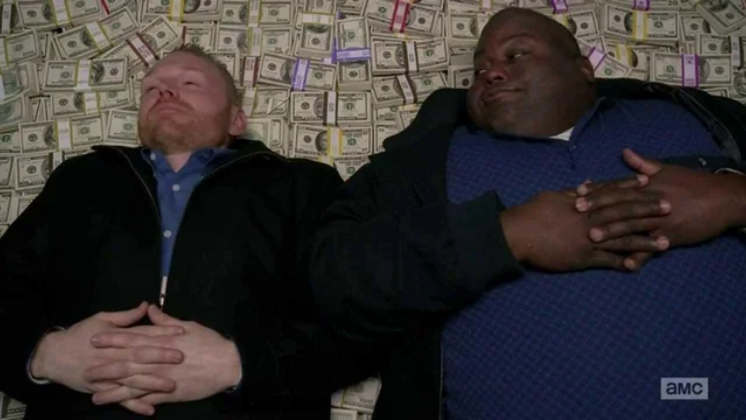

In [40]:
import matplotlib.pyplot as plt

# Caminho da pasta com os arquivos JSON
data_dir = pathlib.Path("data")

# Contador para as tags
tag_counter = {}

# Abrindo e processando os arquivos JSON
for json_file in data_dir.rglob("*.json"):
    with json_file.open("r", encoding="utf-8") as f:
        data = json.load(f)
        tags = data.get("tags", [])  # Obtém a lista de tags
        for tag in tags:
            if tag in tag_counter:
                tag_counter[tag] += 1
            else:
                tag_counter[tag] = 1

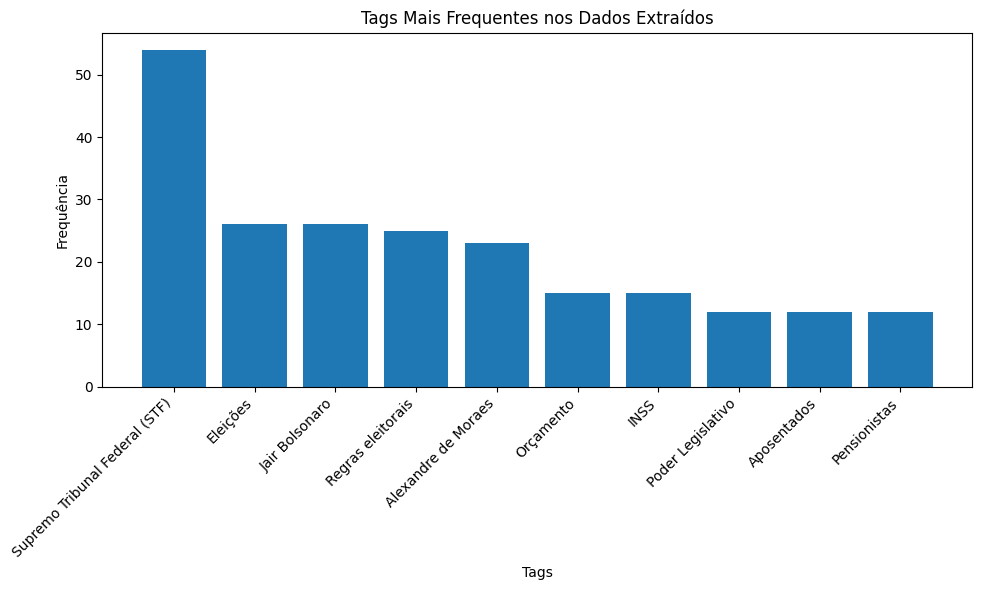

In [41]:
# Criando o dicionário com as tags e suas contagens
tag_count_dict = dict(sorted(tag_counter.items(), key=lambda x: x[1], reverse=True))

# Selecionando as tags mais comuns
top_tags = list(tag_count_dict.items())[:10]  # Top 10 tags mais frequentes

# Separando os dados para o gráfico
labels, values = zip(*top_tags)

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.bar(labels, values)
plt.xlabel("Tags")
plt.ylabel("Frequência")
plt.title("Tags Mais Frequentes nos Dados Extraídos")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

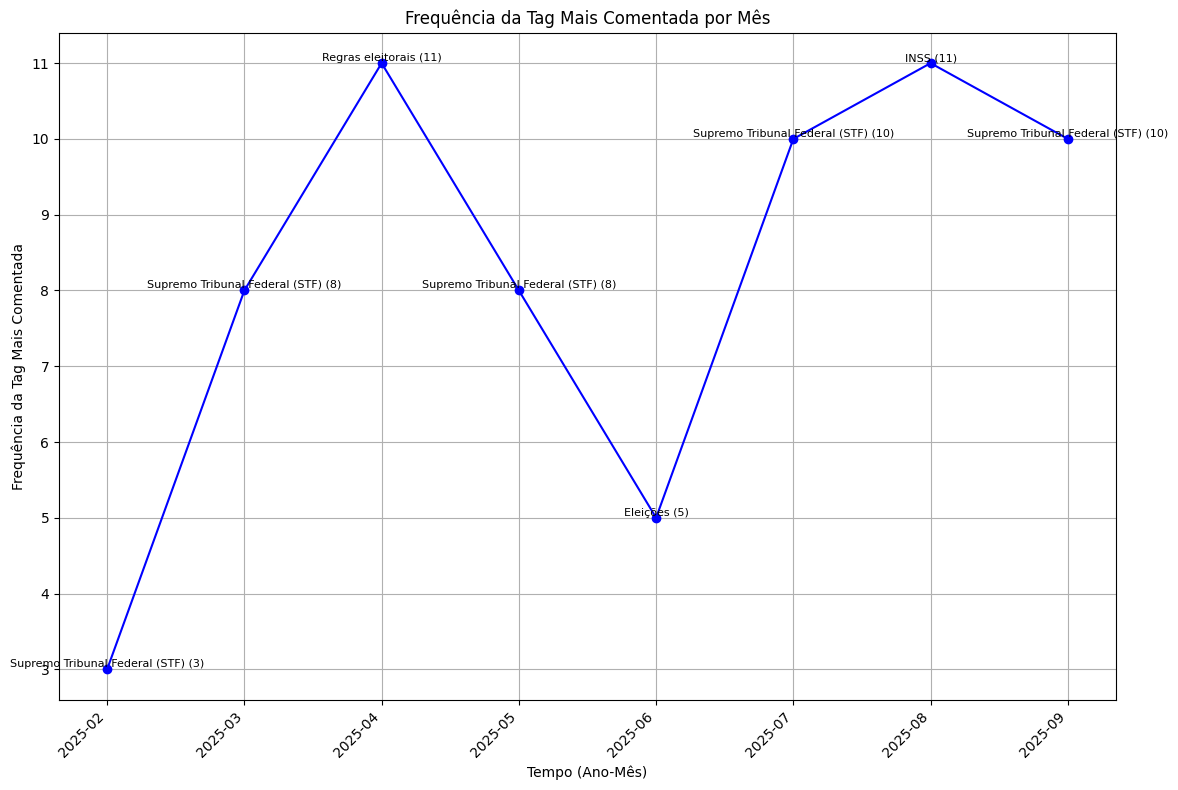

In [42]:
from datetime import datetime
import pandas as pd

# Caminho da pasta com os arquivos JSON
data_dir = pathlib.Path("data")

records = []

# Abrindo e processando os arquivos JSON
for json_file in data_dir.rglob("*.json"):
    with json_file.open("r", encoding="utf-8") as f:
        data = json.load(f)
        tags = data.get("tags", [])  # Obtém a lista de tags
        date_str = data.get("data", "")  # Data no formato ISO 8601
        if date_str:
            date = datetime.fromisoformat(date_str)
            month = date.strftime("%Y-%m")  # Extrair ano e mês (ex: 2024-12)
            for tag in tags:
                records.append({"month": month, "tag": tag})

# Criando um DataFrame com os dados
df = pd.DataFrame(records)

# Contando as tags por mês
monthly_tag_counts = df.groupby(["month", "tag"]).size().reset_index(name="count")

# Identificando a tag mais comentada por mês
most_common_per_month = (monthly_tag_counts.loc[monthly_tag_counts.groupby("month")["count"].idxmax()]
                         .sort_values("month"))

# Preparando dados para o gráfico
months = most_common_per_month["month"].tolist()
common_tags = most_common_per_month["tag"].tolist()
common_tag_counts = most_common_per_month["count"].tolist()

# Criando o gráfico
plt.figure(figsize=(12, 8))
plt.plot(months, common_tag_counts, marker="o", linestyle="-", color="b")
for i, count in enumerate(common_tag_counts):
    plt.text(months[i], count, f"{common_tags[i]} ({count})", fontsize=8, ha="center", va="bottom")
plt.xlabel("Tempo (Ano-Mês)")
plt.ylabel("Frequência da Tag Mais Comentada")
plt.title("Frequência da Tag Mais Comentada por Mês")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid(True)
plt.show()

## Extra

**Vamos usar o scraping no site do governo até sermos banidos – tudo pela ciência (de dados)!**

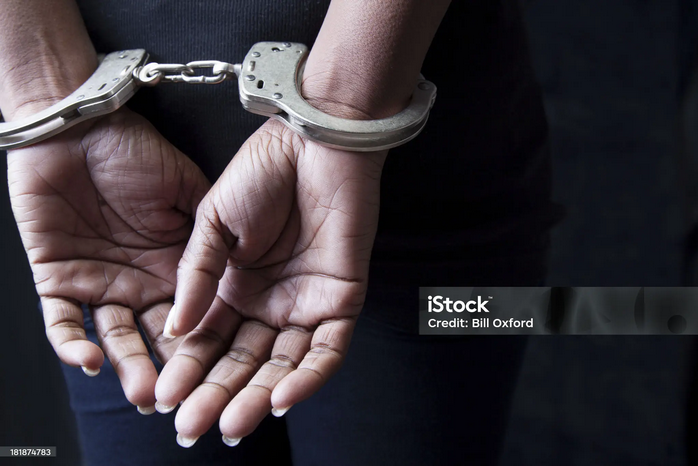